# Classifier for Heart Disease
# Project topic



In this project, we will build **Decision Tree** to classify whether patients have heart disease or not. We will use KNN and Logistic Regression models to compare their performances. 

We will use Cost Complexity Pruning technique to build this Classification Decision Tree.  It uses continuous and categorical data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) to predict whether or not a patient has [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease):

Classification Decision Trees are a good method because each step in the decision making process is easy to understand.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). However, in this case, we only predict the patients has heart disease as value **1**, do not have heart disease as value **0**.

# Import the modules

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Import the data
We load in a dataset from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.
Specifically, we are going to use the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.



In [37]:
# download the data directly from UCI
columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  names=columns)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [39]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [40]:
# targtet value
df["hd"].unique()

array([0, 2, 1, 3, 4])

We see that the target variable is hd. The others are feature variables:
1. age
2. sex
3. cp
4. restbp
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal
14. hd

We can see that the sample has `303` rows, `14` columns, the data type is `float64`, object and `int64`. 

# Data Cleaning and Exploratory Data Analysis

In [41]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We can see that two columns, **ca** and **thal**, have the `object` type and one column, **hd** has `int64`.

The fact that the **ca** and **thal** columns have `object` data types is because there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's print out their unique values. 

In [42]:
## print out unique values in the column called 'ca'
print(df['ca'].unique())
## print out unique values in the column called 'thal'
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and question marks (?). The numbers represent the number of blood vessels and the question marks represent missing data.
Also, **thal** contains a mixture of numbers, representing the different diagnoses and question marks, which represent missing values.

In [43]:
# print the number of rows that contain missing values.
print(len(df.loc[(df['ca'] == '?') 
           | 
           (df['thal'] == '?')]))
# print out the rows that contain missing values.
df.loc[(df['ca'] == '?') 
       | 
       (df['thal'] == '?')]

6


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


We can see that only 6 rows have missing values

In [44]:
# number of rows
len(df)

303

**Complete case analysis** ( CCA ) is to drop any rows that have missing values. It is suitable if the number of rows with missing values are very small ( less than 5%) compared to the total number of rows. 
In this case, the total number of rows are 303, so only 6 of 303, which is **2%**.
Therefore, we will remove the rows with missing values, rather than try to impute their values. 

We will remove the rows with missing values by selecting all the rows that *do not* contain question marks in either the **ca** or **thal** columns:

In [45]:
df = df.loc[(df['ca'] != '?') 
                       & 
                       (df['thal'] != '?')]
len(df)

297

we can also make sure **ca** and **thal** do not contain question marks by printing its unique values:


In [46]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


We have verified that `df` does not contain any missing values. 

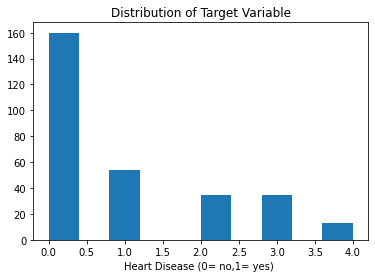

In [47]:
# draw histograms of target values 
plt.title ("Distribution of Target Variable")
plt.xlabel ("Heart Disease (0= no,1= yes) ")
plt.hist (df['hd'])
plt.show()

<AxesSubplot:>

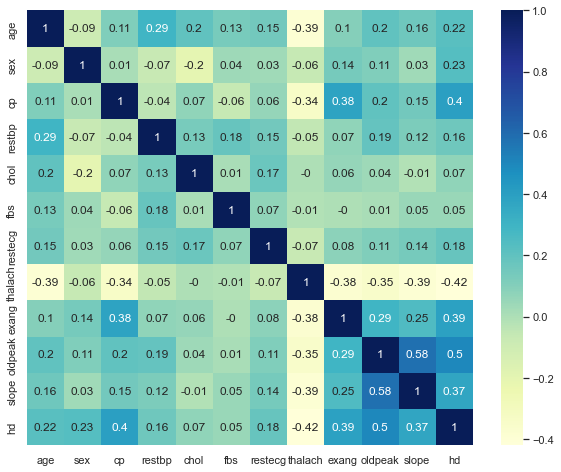

In [48]:
# visualizing correlation matrix using a heat map
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df.corr().round(2), annot=True,cmap="YlGnBu")

# Split the Data into features and target variables

The first step is to split the data into two parts:
1. The columns of data that we will use to make classifications.
2. The column of data that we want to predict.

We will use `X` to represent the columns of data that we will use to make classifications and `y`  to represent the thing we want to predict. In this case, we want to predict **hd** (heart disease).

In [13]:
X = df.drop('hd', axis=1)
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [14]:
y = df['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64


#  One-Hot Encoding

The list below is features information. Dataset from **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**.

1. age: age in years
2. sex: sex (1 = male; 0 = female)
  - 0 = female
  - 1 = male
3. cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trestbp: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



The columns **cp**, **restecg**, **slope**, **thal**, contain categories. Thus, in order to use categorical data, we have to convert columns of categorical data into multiple columns of binary values. This is called **One-Hot Encoding**. So, we will convert it, using **One-Hot Encoding**, into a series of columns that only contains **0s** and **1s**.

In [15]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
# output of target value
y.unique()

array([0, 2, 1, 3, 4])

Since we are only making a tree that does simple classification and only cares if the patient has heart disease or not, we need to convert all numbers > **0** to **1**.

In [17]:
y[y > 0] = 1  
y.unique()               

array([0, 1])

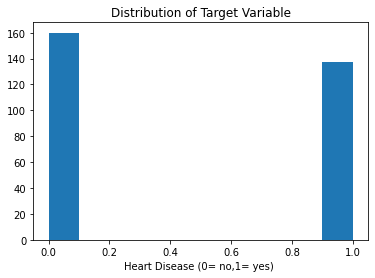

In [18]:
# draw histograms of target values 
plt.title ("Distribution of Target Variable")
plt.xlabel ("Heart Disease (0= no,1= yes) ")
plt.hist (df['hd'])
plt.show()

# Build Model Classification Decision Tree

In [19]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a decision tree and fit it to the training data
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

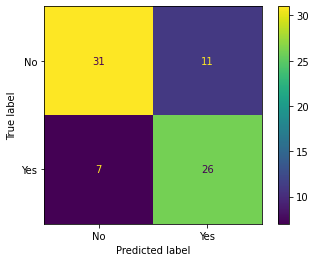

In [20]:
# plot confusion matrix.
# Yes : have heart disease, NO: does not have heart disease
plot_confusion_matrix(clf, X_test, y_test, display_labels=["No", "Yes"])

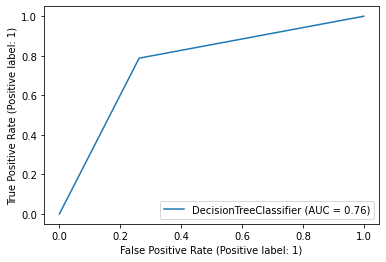

In [21]:
# plot roc curve
plot_roc_curve(clf, X_test, y_test) 

In [22]:
# accuracy score for Decision tree
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.76

# Build Model K-nearest Neighbor ( KNN )



In [23]:
# create KNN and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

# accuracy score for KNN
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.64

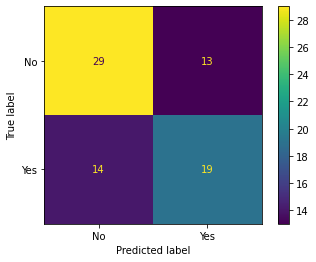

In [24]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=["No", "Yes"])

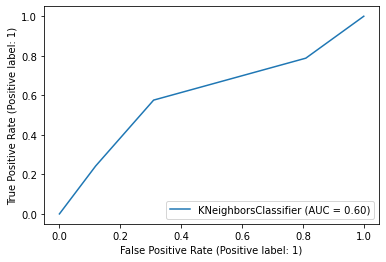

In [25]:
plot_roc_curve(knn, X_test, y_test) 

# Build Model Logistic Regression

In [26]:
LogReg = LogisticRegression().fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
accuracy_score(y_test,y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9066666666666666

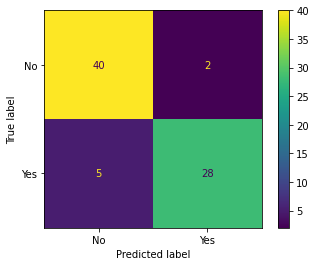

In [27]:
plot_confusion_matrix(LogReg, X_test, y_test, display_labels=["No", "Yes"])

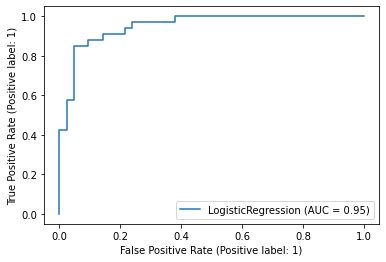

In [28]:
plot_roc_curve(LogReg, X_test, y_test) 

We can see that the model decision tree the accuracy is `0.76`. Since decision tree is easy to **overfitting**. We will use **Cost Complexity Pruning** to prune the tree. 

# Cost Complexity Pruning--Hyperparameter Tuning

**Decision Trees** are notorious for being **overfit** to the Training Dataset, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Dataset.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values.  We'll do this for both the Training Dataset and the Testing Dataset.

We will extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha`. 

`alpha` is hyperparameter in Decision Tree Model

In [29]:
path = clf.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] 

clfs = [] 

## create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

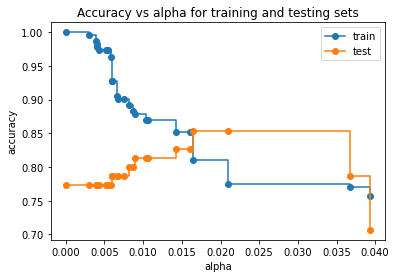

In [30]:
# Plot the accuracy of the trees using training data and testing data
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Cross Validation

<AxesSubplot:xlabel='tree'>

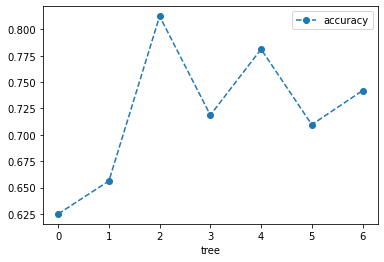

In [31]:
# create the tree with ccp_alpha=0.016
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# use 7-fold cross validation create 7 different training and testing datasets 
scores = cross_val_score(clf, X_train, y_train, cv=7) 
df = pd.DataFrame(data={'tree': range(7), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies.

# Results and Analysis

In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when `alpha` is about **0.016**. After this value for `alpha`, the accuracy of the **Training Dataset** drops off and that suggests we should set `ccp_alpha=0.016`.

In [32]:
ideal_ccp_alpha = 0.016
clf = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha)
clf = clf.fit(X_train, y_train)

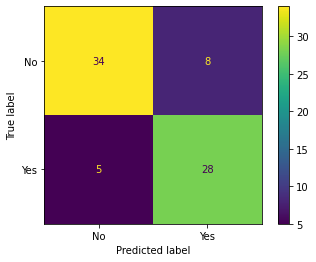

In [33]:
# confusion_matrix evaluation metric
plot_confusion_matrix(clf, X_test, y_test, display_labels=["No", "Yes"])

## Confusion_matrix summary
In the graph,each number represents as below: 

**34** – patients with no heart disease classified as negative(**True Negative**)

**8** – patients with no heart disease classified as positive(**False Positive**)

**5** – patients with heart disease classified as negative (**False Negative**)

**28** – patients with heart disease classified as positive (**True Positive**)

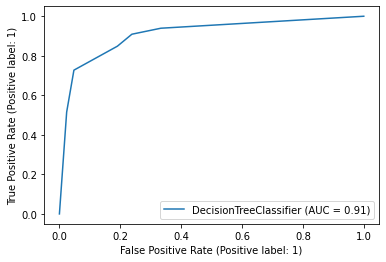

In [34]:
# ROC_AUC evaluation metric
plot_roc_curve(clf, X_test, y_test) 

In [35]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8266666666666667

We can see that pruning a tree with **cost complexity pruning** can improves the accuracy with the testing data. Its performance improves **8.8%**. The accuracy of Model KNN is low which is 0.64. However, the Logistic Regression model has very high accuracy which is 0.91.

# Conclusion

We can see that the decision tree is easy to overfit. Cost complexity pruning can simply improve the accuracy by pruning the tree. However, compared to Logistic Regression, the accuracy of the decision tree is lower. We can assume that in this case study, Logistic Regression is a good way to classify whether a patient has heart disease or not.

The KNN model does not work well.The relatively low accuracy of KNN is caused by several factors. One of them is that every characteristic of the method has the same result on calculating distance. The solution of this problem is to give weight to each data characteristic. KNN works well with a small number of input variables, but struggles when the number of inputs is very large. Each input variable can be considered a dimension of a p-dimensional input space.

To improve this model, we can use Logistic Regression or we can try use cross validation in Decision Tree. 